# Import And Install Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Load the Dataset

In [4]:
data=pd.read_csv('obesity.csv')

# Understand And Organize the Dataset

In [6]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [8]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


# Check for missing values

In [10]:
data.isnull().value_counts()

Gender  Age    Height  Weight  family_history_with_overweight  FAVC   FCVC   NCP    CAEC   SMOKE  CH2O   SCC    FAF    TUE    CALC   MTRANS  NObeyesdad
False   False  False   False   False                           False  False  False  False  False  False  False  False  False  False  False   False         2111
Name: count, dtype: int64

# EDA (Exploratory Data Analysis)

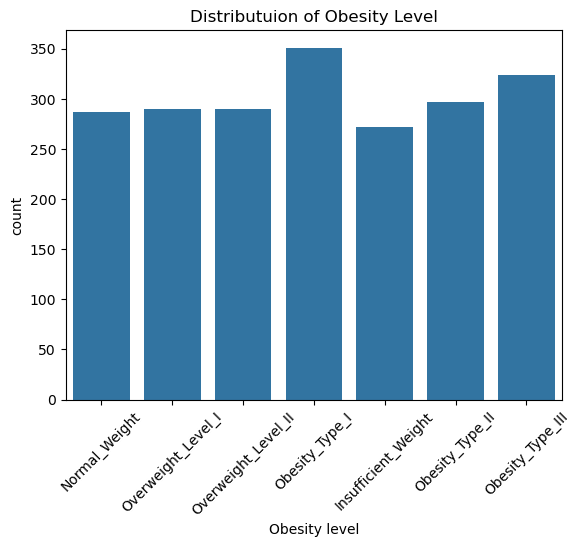

In [12]:
sns.countplot(data,x='NObeyesdad')
plt.xticks(rotation=45)
plt.title('Distributuion of Obesity Level')
plt.xlabel('Obesity level')
plt.show()

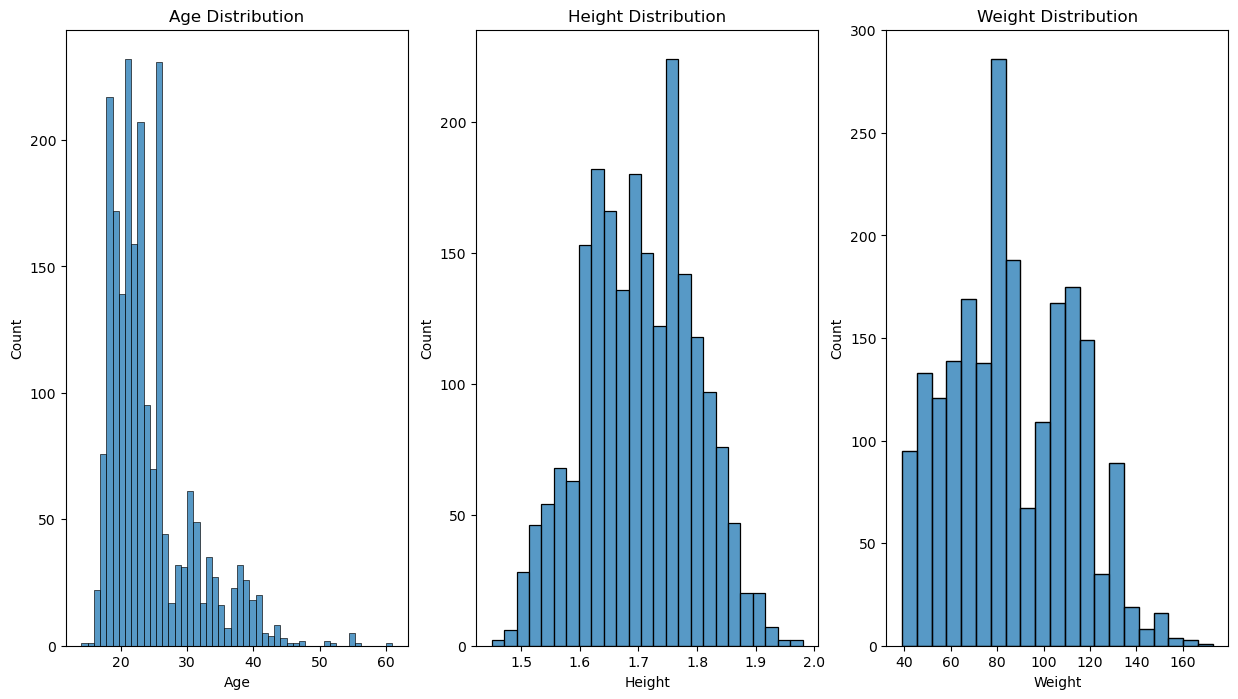

In [13]:
fig,axes=plt.subplots(ncols=3,nrows=1,figsize=(15,8))
axes[0]=sns.histplot(data,x='Age',ax=axes[0])
axes[0].set_title('Age Distribution')

axes[1]=sns.histplot(data,x='Height',ax=axes[1])
axes[1].set_title('Height Distribution')


axes[2]=sns.histplot(data,x='Weight',ax=axes[2])
axes[2].set_title('Weight Distribution')

plt.show()

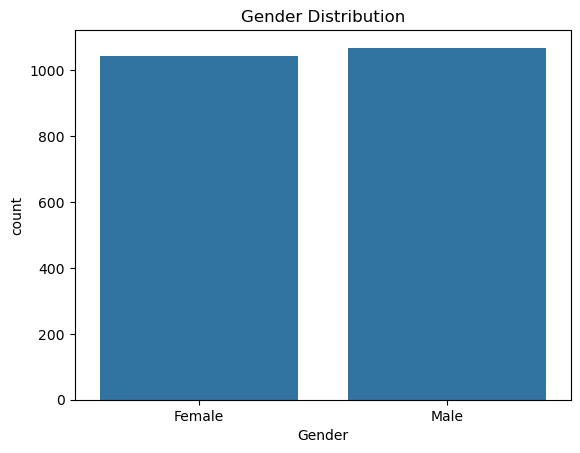

In [14]:
sns.countplot(data,x='Gender')
plt.title('Gender Distribution')
plt.show()

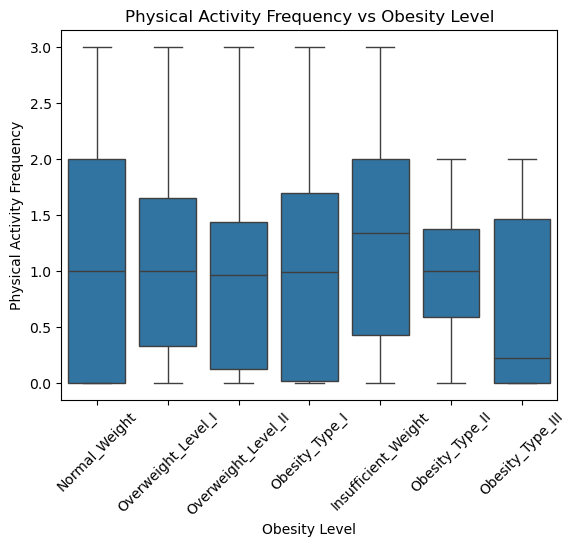

In [15]:
sns.boxplot(data,x='NObeyesdad',y='FAF')
plt.xticks(rotation=45)
plt.title('Physical Activity Frequency vs Obesity Level')
plt.xlabel('Obesity Level')
plt.ylabel('Physical Activity Frequency')
plt.show()

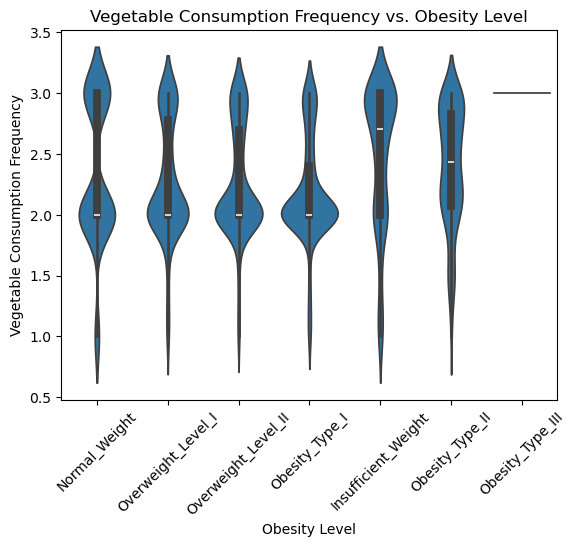

In [16]:
sns.violinplot(x="NObeyesdad", y="FCVC", data=data)
plt.xticks(rotation=45)
plt.title("Vegetable Consumption Frequency vs. Obesity Level")
plt.xlabel('Obesity Level')
plt.ylabel('Vegetable Consumption Frequency')
plt.show()

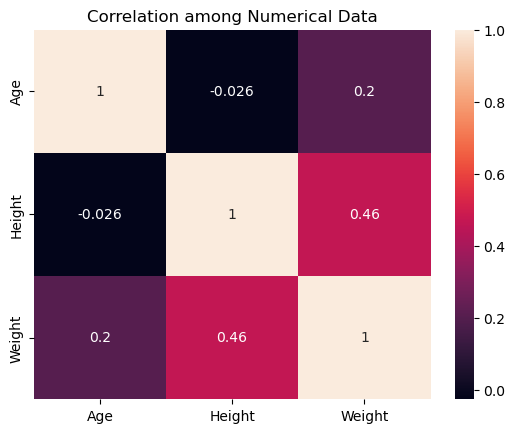

In [58]:
sns.heatmap(data[['Age','Height','Weight']].corr(),annot=True)
plt.title('Correlation among Numerical Data')
plt.show()

# Preprocessing

## Scaling the continous data

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[['Age','Height','Weight','NCP','CH2O','FAF']]=scaler.fit_transform(data[['Age','Height','Weight','NCP','CH2O','FAF']])

## Label encoding for catagorical data

In [22]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data[['Gender','CAEC','CALC','MTRANS','NObeyesdad']]=data[['Gender','CAEC','CALC','MTRANS','NObeyesdad']].apply(lambda col: encoder.fit_transform(col))

## Conversion of binary data

In [24]:
data[['family_history_with_overweight','SMOKE','SCC','FAVC']]=data[['family_history_with_overweight','SMOKE','SCC','FAVC']].apply(lambda col:col.map({'yes':1,'no':0}))

In [25]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,2.0,0.404153,2,0,-0.013073,0,-1.188039,1.0,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,3.0,0.404153,2,1,1.618759,1,2.339750,0.0,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,2.0,0.404153,2,0,-0.013073,0,1.163820,1.0,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,3.0,0.404153,2,0,-0.013073,0,1.163820,0.0,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,2.0,-2.167023,2,0,-0.013073,0,-1.188039,0.0,2,3,6


# Training the model

In [27]:
from sklearn.cluster import KMeans

## Elbow method for determine the optimal k

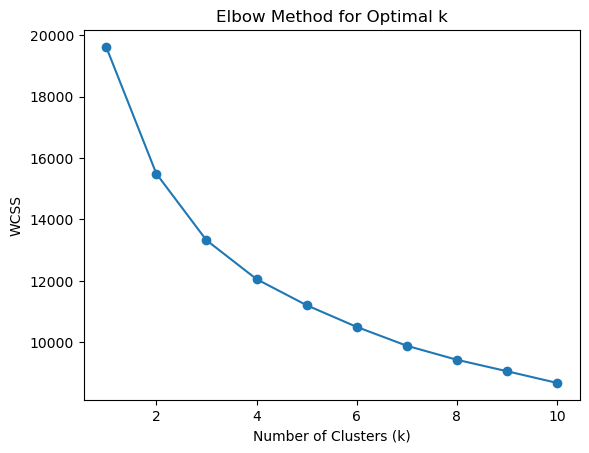

In [29]:
wcss = []  

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data.drop('NObeyesdad',axis=1))
    wcss.append(kmeans.inertia_)  # Inertia = Sum of squared distances to cluster center

# Plot Elbow Graph
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


## Fit and predict the model

In [31]:
# Choose an optimal k (from the elbow method)
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data["Cluster"] = kmeans.fit_predict(data.drop('NObeyesdad',axis=1))  


# Original data vs Clustered data

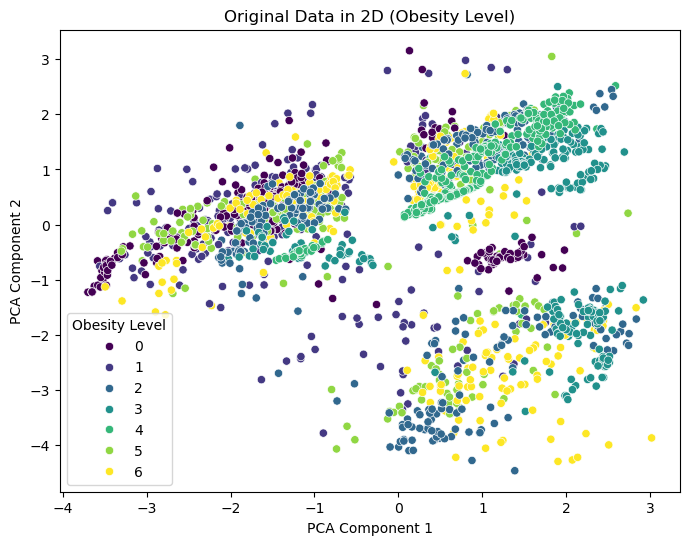

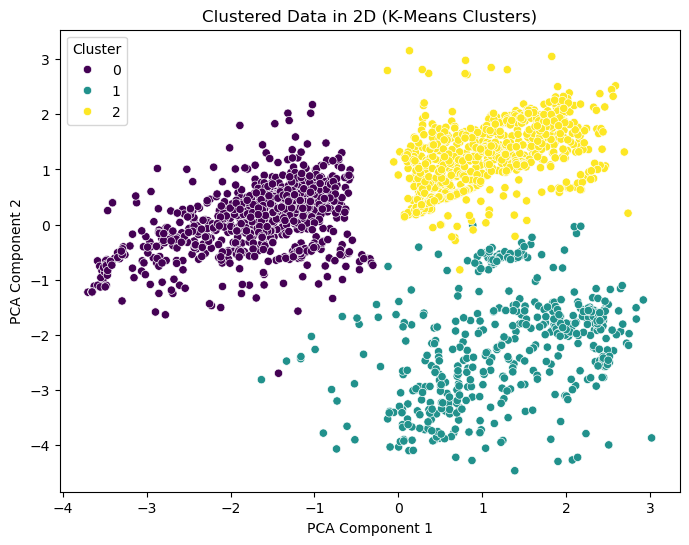

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2 dimensions
reduced_data = pca.fit_transform(data.drop('NObeyesdad',axis=1))

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=data["NObeyesdad"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Original Data in 2D (Obesity Level)")
plt.legend(title="Obesity Level")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=reduced_data[:,0], y=reduced_data[:,1], hue=data["Cluster"], palette="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clustered Data in 2D (K-Means Clusters)")
plt.legend(title="Cluster")
plt.show()

## Cluster characteristics

In [35]:
cluster_summary = data.groupby("Cluster").mean()
print(cluster_summary)

           Gender       Age    Height    Weight  \
Cluster                                           
0        0.350939 -0.470913 -0.611083 -0.727769   
1        0.639485  1.158994  0.143288 -0.034528   
2        0.593947 -0.175124  0.572346  0.802206   

         family_history_with_overweight      FAVC      FCVC       NCP  \
Cluster                                                                 
0                              0.644366  0.796948  2.343914 -0.348769   
1                              0.886266  0.909871  2.356588  0.107478   
2                              0.963430  0.962169  2.536463  0.311560   

             CAEC     SMOKE      CH2O       SCC       FAF       TUE      CALC  \
Cluster                                                                         
0        1.769953  0.017606 -0.368948  0.083333 -0.048537  0.776825  2.403756   
1        1.892704  0.027897 -0.076010  0.032189  0.019285  0.464064  2.283262   
2        1.935687  0.020177  0.441065  0.012610  0.040